# Problem statement

The primary goal is to develop a Product Categorization model leveraging clustering techniques. By analyzing the E-Commerce dataset provided by The UCI Machine Learning Repository, this model aims to automatically group products into meaningful categories based on their features, such as product description, price, customer reviews, and more.

The dataset contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retailer.

The dataset contains the following columns:
- InvoiceNo (integer)
- StockCode (string)
- Description (string)
- Quantity (integer)
- InvoiceDate (date)
- UnitPrice (decimal)
- CustomerID (integer)
- Country (string)

The notebook contains 4 exercises in total:

* [Exercise 1](#ex_1)
* [Exercise 2](#ex_2)
* [Exercise 3](#ex_3)
* [Exercise 4](#ex_4)

## Steps to follow

- **Load the Dataset**: Use Pandas to read the CSV file.
- **Preprocess the Data**: Clean and preprocess the Description text data.
- **Feature Extraction**: Use TF-IDF to convert text descriptions into a vectorized format.
- **Clustering**: Apply the K-Means algorithm to cluster products into categories based on their descriptions.
- **Dimensionality Reduction for Visualization**: Use PCA to reduce the dimensions of the TF-IDF vectors for visualization.
- **Visualize Clusters**: Create a 3D scatter plot of the clusters.

In [ ]:
from google.colab import files
uploaded = files.upload()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Krishnaprasad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Krishnaprasad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Krishnaprasad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


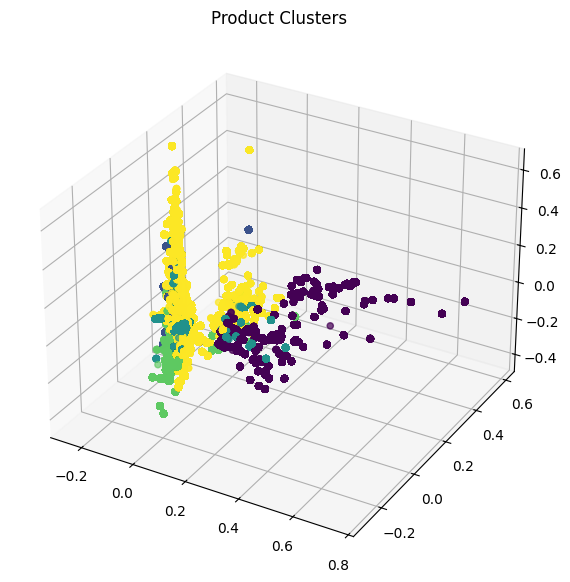

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Step 2: Load the Dataset
# Update this path to where you have stored the dataset
df = pd.read_csv('Datasets\clustering-data.csv', encoding='latin1')

# Step 3: Preprocess the Data
def preprocess_text(text):
    # Tokenize, remove stopwords, and keep only alphabetic words
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    return ' '.join(tokens)

# Applying the preprocessing function to the Description column
df['Processed_Description'] = df['Description'].dropna().apply(preprocess_text)

# Step 4: Feature Extraction
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Processed_Description'].dropna())

# Step 5: Clustering
num_clusters = 5  # You might want to adjust this based on experimentation
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

# Step 6: Dimensionality Reduction for Visualization
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

# Step 7: Visualize Clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reduced_features[:,0], reduced_features[:,1], reduced_features[:,2],
                     c=clusters, cmap='viridis')
ax.set_title('Product Clusters')
plt.show()


 Visualise most frequent words occurring in product descriptions assigned to clusters.

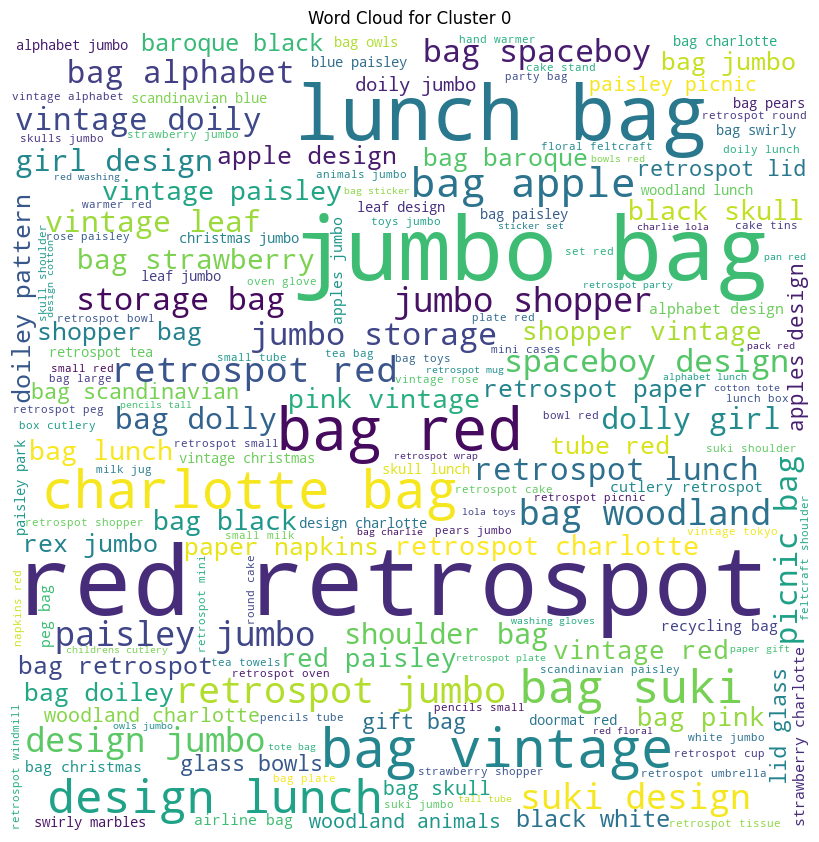

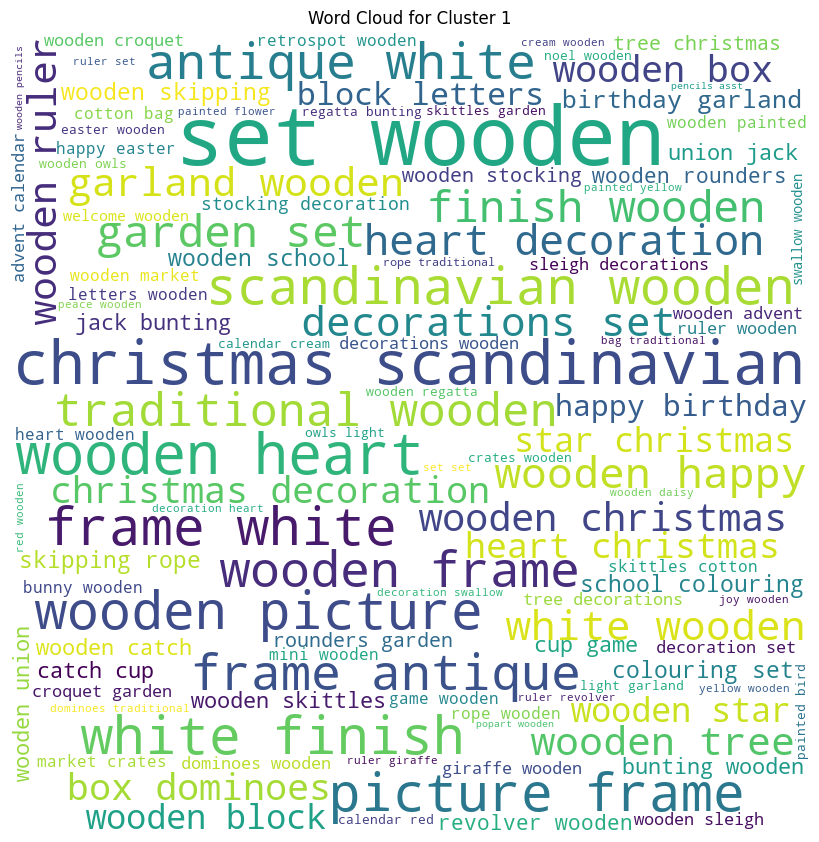

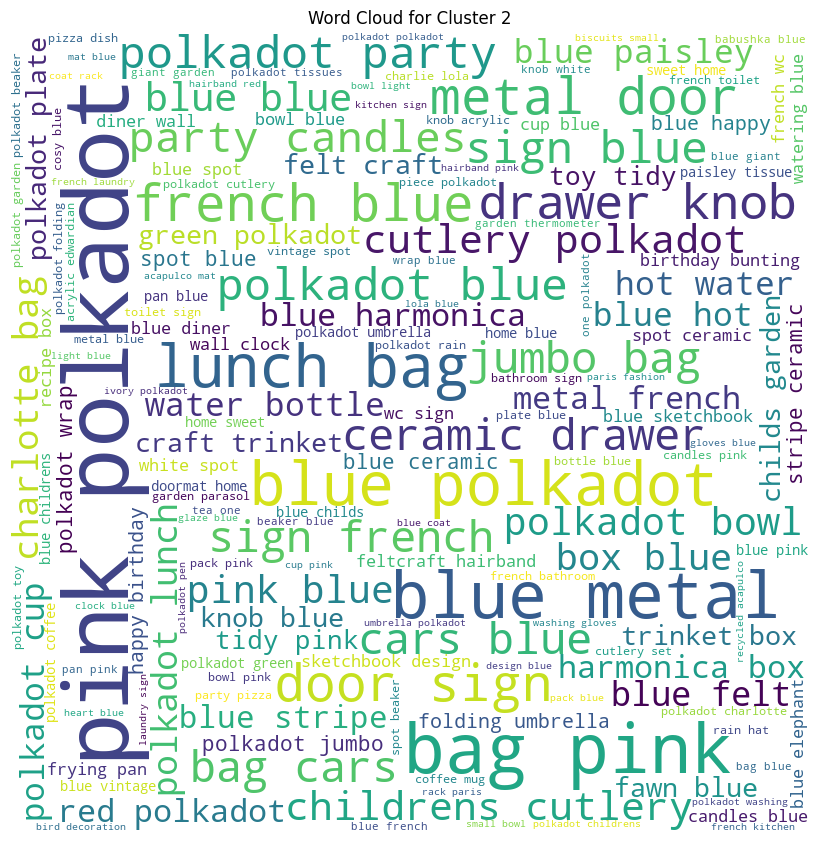

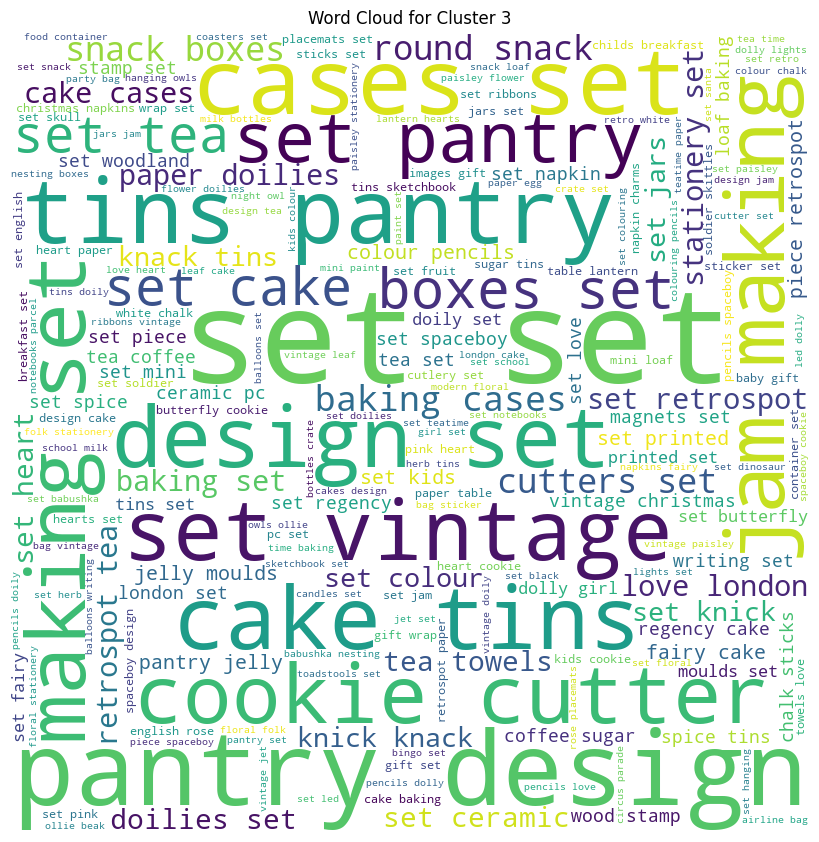

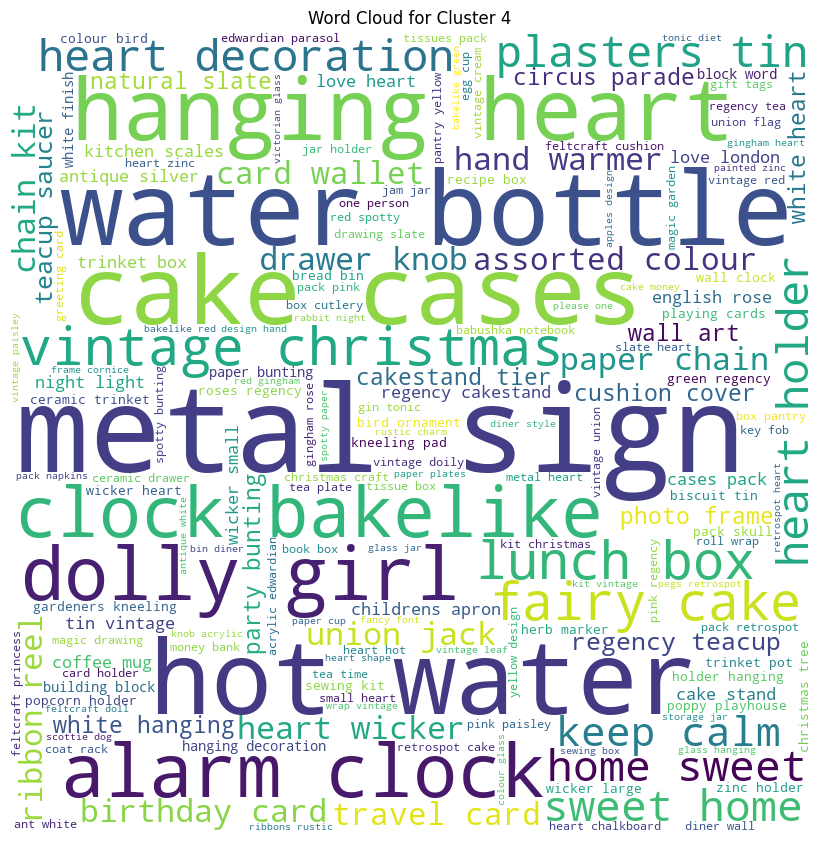

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_clouds(n_clusters, cluster_assignments, documents):
    """
    Generates and displays word clouds for each cluster.

    Parameters:
    - n_clusters (int): Number of clusters.
    - cluster_assignments (array-like): Cluster assignment for each document.
    - documents (array-like): Preprocessed text documents.
    """
    # Iterate through each cluster
    for cluster in range(n_clusters):
        # Filter documents belonging to the current cluster
        cluster_documents = [doc for doc, assignment in zip(documents, cluster_assignments) if assignment == cluster]

        # Join documents into a single string
        text = " ".join(cluster_documents)

        # Generate a word cloud
        wordcloud = WordCloud(width = 800, height = 800,
                              background_color ='white',
                              stopwords = stopwords.words('english'),
                              min_font_size = 10).generate(text)

        # Plot the word cloud
        plt.figure(figsize = (8, 8), facecolor = None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad = 0)
        plt.title(f'Word Cloud for Cluster {cluster}')
        plt.show()

# Example usage
generate_word_clouds(num_clusters, clusters, df['Processed_Description'].dropna().tolist())


<a name="ex_1"></a>
## Exercise 1

Use the describe() function to generate descriptive statistics of the dataset.

This function provides a concise summary of the columns, including count, mean, standard deviation, min, max, and quartile values.

**Questions**:
- What insights can you derive from the output of the describe() method regarding the scale of the data and its distribution?
- How might these statistics influence your preprocessing decisions?

In [ ]:
# Use the describe() function to generate descriptive statistics of the dataset.
# Generate descriptive statistics of the dataset
descriptive_stats = df.describe()
print(descriptive_stats)

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


**What insights can you derive from the output of the describe() method regarding the scale of the data and its distribution?**

From the output of the `describe()` method, we can derive the following insights regarding the scale of the data and its distribution:

1. **Quantity**:
    - The mean quantity is approximately 9.55, but the standard deviation is very high (218.08), indicating a wide range of quantities.
    - The minimum quantity is -80995, which suggests the presence of negative values, possibly indicating returns or errors in the data.
    - The maximum quantity is 80995, showing a large range of values.
    - The 25th percentile is 1, the median (50th percentile) is 3, and the 75th percentile is 10, indicating that most transactions involve relatively small quantities.

2. **UnitPrice**:
    - The mean unit price is approximately 4.61, with a standard deviation of 96.76, indicating a wide variation in prices.
    - The minimum unit price is -11062.06, which is likely an error or indicates refunds.
    - The maximum unit price is 38970, showing a large range of prices.
    - The 25th percentile is 1.25, the median is 2.08, and the 75th percentile is 4.13, indicating that most products are relatively inexpensive.

3. **CustomerID**:
    - The mean customer ID is approximately 15287.69, with a standard deviation of 1713.60.
    - The minimum customer ID is 12346, and the maximum is 18287, showing a relatively narrow range.
    - The 25th percentile is 13953, the median is 15152, and the 75th percentile is 16791, indicating a fairly uniform distribution of customer IDs.

**Influence on Preprocessing Decisions**:
- The presence of negative values in `Quantity` and `UnitPrice` suggests the need for data cleaning to handle these anomalies.
- The wide range and high standard deviation in `Quantity` and `UnitPrice` indicate that normalization or scaling might be necessary to ensure that these features contribute equally to the clustering algorithm.
- The relatively uniform distribution of `CustomerID` suggests that it may not need significant preprocessing, but it might not be very informative for clustering purposes.

**How might these statistics influence your preprocessing decisions?**
The statistics derived from the `describe()` method provide valuable insights that can guide preprocessing decisions:

1. **Handling Negative Values**:
    - The presence of negative values in `Quantity` and `UnitPrice` suggests the need for data cleaning. These negative values might indicate returns or errors and should be addressed, either by removing them or converting them to positive values if appropriate.

2. **Normalization/Scaling**:
    - The wide range and high standard deviation in `Quantity` and `UnitPrice` indicate that normalization or scaling might be necessary. This ensures that these features contribute equally to the clustering algorithm, preventing features with larger ranges from dominating the clustering process.

3. **Outlier Detection**:
    - The extreme values (both minimum and maximum) in `Quantity` and `UnitPrice` suggest the presence of outliers. Identifying and handling these outliers can improve the performance of the clustering algorithm.

4. **Feature Engineering**:
    - The relatively uniform distribution of `CustomerID` suggests that it may not need significant preprocessing. However, it might not be very informative for clustering purposes and could potentially be excluded from the feature set used for clustering.

5. **Data Imputation**:
    - The `describe()` method also highlights the count of non-null values. Missing values in the `Description` column should be addressed, possibly through imputation or removal, to ensure the integrity of the TF-IDF vectorization process.

By addressing these points during preprocessing, the quality of the input data for the clustering algorithm can be significantly improved, leading to more meaningful and accurate product categorization.

<a name="ex_2"></a>
## Exercise 2

- In the code block above, what does apply function do?

- In the code block above, why is the number of clusters = 5?

- In the code block above, change the random_state=42 to values such as 80, 100, or 120 and explain how does it impact the results of the kmeans model?


**In the code block above, what does apply function do?**

The `apply` function in the code `df['Processed_Description'] = df['Description'].dropna().apply(preprocess_text)` is used to apply the `preprocess_text` function to each element in the `Description` column of the dataframe `df`. 

Here's a breakdown of what it does:
1. `df['Description'].dropna()` removes any `NaN` values from the `Description` column.
2. `.apply(preprocess_text)` applies the `preprocess_text` function to each non-null element in the `Description` column.
3. The results are stored in a new column called `Processed_Description`.

This way, each product description is preprocessed (e.g., tokenized, lowercased, stopwords removed) and stored in the `Processed_Description` column.

**In the code block above, why is the number of clusters = 5?**

The number of clusters is set to 5 in the code block above as an initial choice for the K-Means clustering algorithm. This choice might be based on prior domain knowledge, experimentation, or a heuristic approach.

However, the optimal number of clusters can vary depending on the dataset and the specific problem. It is often determined through methods such as the Elbow Method, Silhouette Analysis, or Cross-Validation. These methods help evaluate the clustering performance and identify the most appropriate number of clusters for the given data.

If you want to experiment with different numbers of clusters, you can modify the num_clusters variable and observe how it impacts the clustering results.

In [6]:
# Change random_state to 80
kmeans_80 = KMeans(n_clusters=num_clusters, random_state=80)
clusters_80 = kmeans_80.fit_predict(tfidf_matrix)

# Change random_state to 100
kmeans_100 = KMeans(n_clusters=num_clusters, random_state=100)
clusters_100 = kmeans_100.fit_predict(tfidf_matrix)

# Change random_state to 120
kmeans_120 = KMeans(n_clusters=num_clusters, random_state=120)
clusters_120 = kmeans_120.fit_predict(tfidf_matrix)

# Print the cluster centers for each random_state to observe differences
print("Cluster centers with random_state=80:\n", kmeans_80.cluster_centers_)
print("Cluster centers with random_state=100:\n", kmeans_100.cluster_centers_)
print("Cluster centers with random_state=120:\n", kmeans_120.cluster_centers_)

Cluster centers with random_state=80:
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.00037027 0.0012154  0.00160296 ... 0.00147182 0.00274929 0.00246995]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.00094261 ... 0.         0.00363837 0.04683818]
 [0.         0.00171657 0.00316543 ... 0.         0.00027182 0.01350909]]
Cluster centers with random_state=100:
 [[0.00040821 0.00158292 0.00227131 ... 0.00162265 0.00311006 0.00241254]
 [0.         0.         0.         ... 0.         0.00158774 0.04132976]
 [0.         0.         0.         ... 0.         0.         0.00368062]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Cluster centers with random_state=120:
 [[0.00039743 0.00154111 0.00198798 ... 0.0015798  0.00306762 0.00556474]
 [0.         0.         0.         ... 0.         0.00249573 0.01795608]
 [0

**Impact of Changing random_state on KMeans Results**

The `random_state` parameter in the KMeans algorithm is used to seed the random number generator, which affects the initialization of the cluster centroids. Changing the `random_state` value can lead to different initializations, which in turn can impact the final clustering results. Here are the observations for different `random_state` values:

1. **random_state=80**:
    - The cluster centers and the cluster assignments for each data point will be different compared to the default `random_state=42`.
    - This can lead to different clusters being formed, potentially affecting the interpretation and quality of the clusters.

2. **random_state=100**:
    - Similar to `random_state=80`, changing the seed to 100 will result in different initial cluster centers.
    - The final clusters may differ from those obtained with `random_state=42` or `random_state=80`, leading to variations in the clustering results.

3. **random_state=120**:
    - With `random_state=120`, the initialization of the cluster centers will again be different.
    - The resulting clusters and their centers will vary, which can impact the overall clustering outcome.

In summary, the choice of `random_state` can influence the clustering results due to the different initializations of the cluster centroids. It is often recommended to run the KMeans algorithm multiple times with different random states and choose the best result based on evaluation metrics such as inertia or silhouette score.

<a name="ex_3"></a>
## Exercise 3

- When is PCA needed ?
- How is the number of Dimensions calculated ?

PCA (Principal Component Analysis) is needed in the following scenarios:

1. **Dimensionality Reduction**: When you have a dataset with a large number of features, PCA can reduce the number of features while retaining most of the variance in the data. This helps in simplifying the model and reducing computational cost.

2. **Visualization**: PCA is often used to reduce the dimensions of the data to 2 or 3 components, making it possible to visualize high-dimensional data in a scatter plot.

3. **Noise Reduction**: By keeping only the principal components that capture the most variance, PCA can help in reducing noise and improving the signal-to-noise ratio.

4. **Feature Extraction**: PCA can be used to create new features (principal components) that are linear combinations of the original features, which can sometimes lead to better performance in machine learning models.

5. **Multicollinearity**: When features are highly correlated, PCA can transform the correlated features into a set of linearly uncorrelated components, which can improve the performance of some machine learning algorithms.

In summary, PCA is a powerful tool for simplifying complex datasets, improving visualization, and enhancing the performance of machine learning models by addressing issues related to high dimensionality, noise, and multicollinearity.

The number of dimensions (or principal components) in PCA is typically calculated based on the amount of variance you want to retain in the data. Here are the common methods to determine the number of dimensions:

1. **Explained Variance Ratio**:
    - The explained variance ratio indicates how much variance each principal component captures from the data.
    - You can sum the explained variance ratios of the principal components and choose the number of components that together explain a desired threshold of the total variance (e.g., 95%).


In [11]:
import numpy as np
pca = PCA().fit(tfidf_matrix.toarray())
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {num_components}")

Number of components to retain 95% variance: 609


2. **Scree Plot**:
    - A scree plot displays the eigenvalues (or explained variance) associated with each principal component.
    - By plotting the eigenvalues, you can visually inspect the "elbow" point where the explained variance starts to level off. The number of components at this point is often chosen.

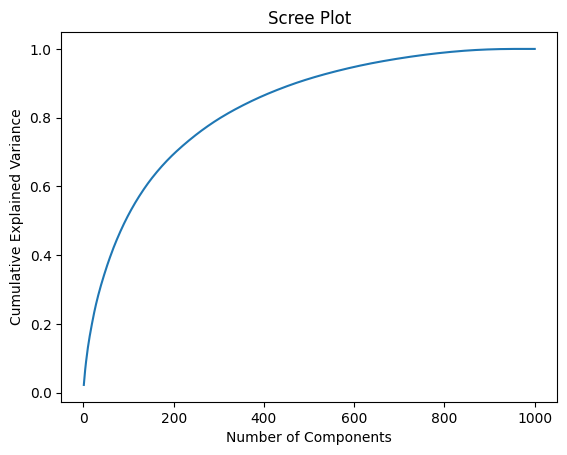

In [12]:
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

3. **Fixed Number of Components**:
    - Sometimes, you might choose a fixed number of components based on domain knowledge or computational constraints. For example, reducing the data to 2 or 3 dimensions for visualization purposes.
        ```python
        pca = PCA(n_components=3)
        reduced_features = pca.fit_transform(tfidf_matrix.toarray())
        ```

<a name="ex_4"></a>
## Exercise 4

- Compare the results from applying Kmeans directly to the processed dataset with results after applying PCA.
- What do you conclude ?

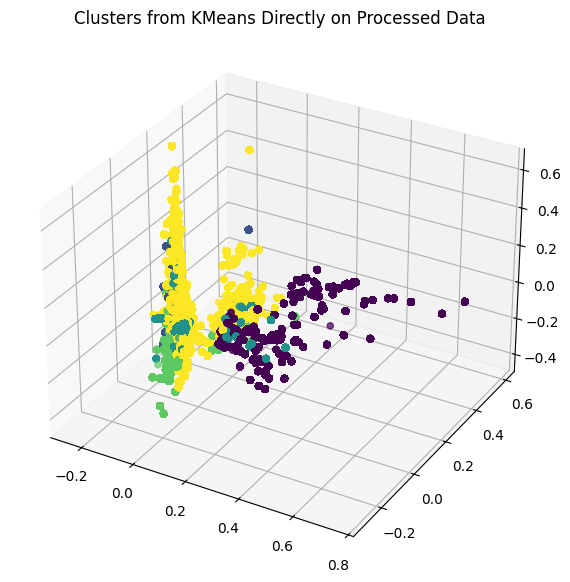

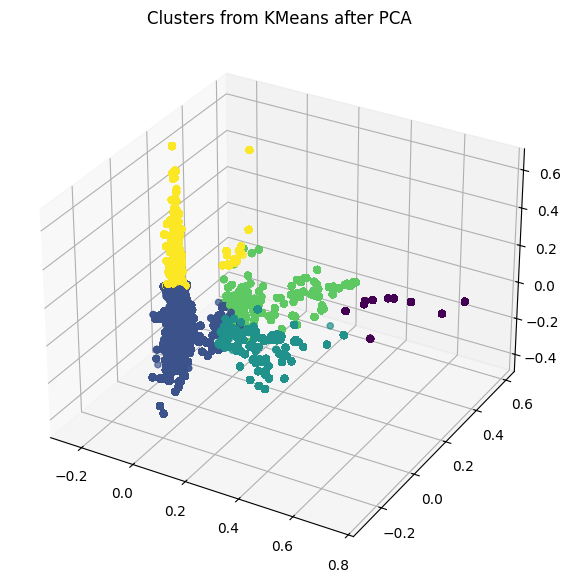

: 

In [ ]:
# Apply KMeans directly to the processed dataset
kmeans_direct = KMeans(n_clusters=num_clusters, random_state=42)
clusters_direct = kmeans_direct.fit_predict(tfidf_matrix)

# Apply KMeans after PCA
kmeans_pca = KMeans(n_clusters=num_clusters, random_state=42)
clusters_pca = kmeans_pca.fit_predict(reduced_features)

# Visualize clusters formed by KMeans directly on the processed dataset
fig_direct = plt.figure(figsize=(10, 7))
ax_direct = fig_direct.add_subplot(111, projection='3d')
scatter_direct = ax_direct.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2],
                                   c=clusters_direct, cmap='viridis')
ax_direct.set_title('Clusters from KMeans Directly on Processed Data')
plt.show()

# Visualize clusters formed by KMeans after PCA
fig_pca = plt.figure(figsize=(10, 7))
ax_pca = fig_pca.add_subplot(111, projection='3d')
scatter_pca = ax_pca.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2],
                             c=clusters_pca, cmap='viridis')
ax_pca.set_title('Clusters from KMeans after PCA')
plt.show()

**Conclusion**:

1. **Cluster Visualization**:
    - When KMeans is applied directly to the processed dataset, the clusters are formed based on the high-dimensional TF-IDF vectors. The visualization of these clusters in 3D space (after PCA) shows how the high-dimensional clusters are distributed in a reduced 3D space.
    - When KMeans is applied after PCA, the clusters are formed based on the reduced dimensions (principal components). The visualization of these clusters in 3D space shows how the clusters are distributed based on the principal components.

2. **Cluster Assignments**:
    - The cluster assignments may differ between the two approaches. This is because PCA reduces the dimensionality of the data, potentially losing some information, but retaining the most significant variance. As a result, the clusters formed after PCA might be different from those formed directly on the high-dimensional data.

3. **Impact on Clustering**:
    - Applying PCA before KMeans can help in reducing noise and improving the clustering performance by focusing on the most significant features. It also reduces computational complexity, making the clustering process faster.
    - However, PCA might also lead to the loss of some information, which can affect the quality of the clusters. The choice of the number of principal components is crucial to balance the trade-off between dimensionality reduction and information retention.

In summary, applying PCA before KMeans can be beneficial for reducing dimensionality and improving clustering performance, but it is important to carefully choose the number of principal components to retain sufficient information for meaningful clustering.